# Simulation - Banking - single queue
### Stu. name : Amirali Khatib 
### Prof. name: Dr.Mohammad Ranjbar

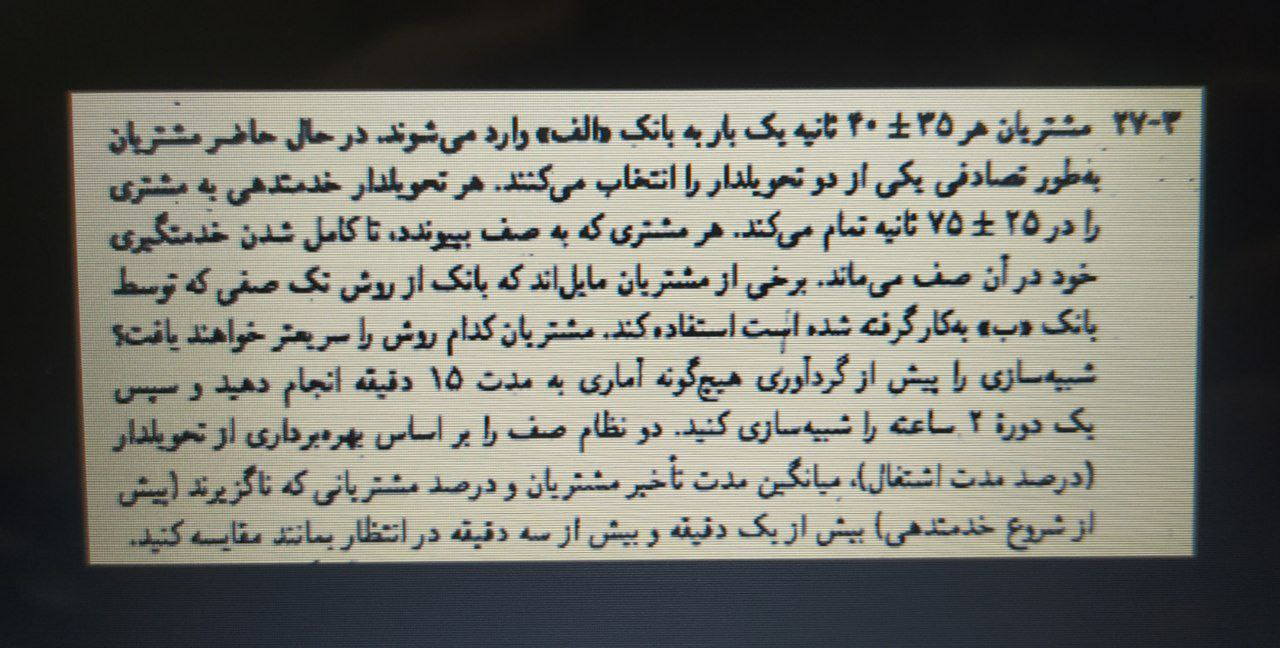

**Problem:**

Every $t_{1} = Uniform(5, 75)$ second customer enter the bank. The customers randomly choose one of the 2 bank receiptionicts. Each bank receiptionict's service duration is $t_{2} = Uniform(50, 100)$. There is one waiting queue in this banking system. Simulate this system for 2 hours and find the value of these items below:
* Percentage of busy time for both bank receiptionict totally
* Average of the time that each customer spend in the queue
* Percentage of the number of customers that spend more than 1 minute in the queue
* Percentage of the number of customers that spend more than 3 minutes in the queue

In [1]:
import numpy as np

In [2]:
#initialization
sim_time = int(input('Enter simulation time: '))
busy_time1, busy_time2 = (0,0) # sum of time duration which servers are still working
s1,s2 = (0,0) # servers status(0,1)
queue = 0     # number of costumers who are waiting for their turn
FEL = []
FEL.append((0,'a'))
current_time = 0
start_time1 , start_time2 = (0,0)
service_time = 0
between_arrival_time = 0
arrival_t = []
arrival_t.append(FEL[0][0])
service_start_t = []


def service(s1,s2):
    return s1 + s2     #(0,1,2)

Enter simulation time: 7200


In [3]:
def arrival():
    global FEL, start_time1, start_time2, busy_time1, busy_time2, arrival_t, service_start_t
    global current_time, between_arrival_time, service_time , s1, s2, queue
    
    between_arrival_time = float(np.random.uniform(low = 5, high = 75, size = 1))
    FEL.append((current_time + between_arrival_time , 'a'))
    FEL.sort()
    arrival_t.append(current_time)
    
    if service(s1, s2) == 0:
        choice = np.random.choice(['s1', 's2'], 1, [0.5, 0.5])[0]
        if choice == 's1':
            s1 = 1
            start_time1 = current_time
            service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
            FEL.append((current_time + service_time, 'd1'))            
            FEL.sort()
            service_start_t.append(current_time)
        elif choice == 's2':
            s2 = 1
            start_time2 = current_time
            service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
            FEL.append((current_time + service_time, 'd2'))
            FEL.sort()
            service_start_t.append(current_time)
    
    elif service(s1, s2) == 1:
        if s1 == 0:
            s1 = 1
            start_time1 = current_time
            service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
            FEL.append((current_time + service_time, 'd1'))
            FEL.sort()
            service_start_t.append(current_time)
        elif s2 == 0:
            s2 = 1
            start_time2 = current_time
            service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
            FEL.append((current_time + service_time, 'd2'))
            FEL.sort()
            service_start_t.append(current_time)
    
    elif service(s1, s2) == 2:
        queue += 1
    
    return None

In [4]:
def departure(d_type):
    global FEL, start_time1, start_time2, busy_time1, busy_time2, arrival_t, service_start_t
    global current_time, between_arrival_time, service_time , s1, s2, queue

    if queue == 0:
        if d_type == 'd1':
            s1 = 0
            busy_time1 += (current_time - start_time1)
            
        elif d_type == 'd2':
            s2 = 0
            busy_time2 += (current_time - start_time2)
    
    elif queue > 0:
        queue -= 1
        if d_type == 'd1':
            if s2 == 0:
                choice = np.random.choice(['s1', 's2'], 1, [0.5, 0.5])[0]
                service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
                if choice == 's1':
                    FEL.append((current_time + service_time, 'd1'))
                    FEL.sort()
                elif choice == 's2':
                    FEL.append((current_time + service_time, 'd1'))
                    FEL.sort()
                service_start_t.append(current_time)
                    
            elif s2 == 1:
                service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
                FEL.append((current_time + service_time, 'd1'))
                FEL.sort()
                service_start_t.append(current_time)
                         
        elif d_type == 'd2':
            if s1 == 0:
                choice = np.random.choice(['s1', 's2'], 1, [0.5, 0.5])[0]
                service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
                if choice == 's1':
                    FEL.append((current_time + service_time, 'd1'))
                    FEL.sort()
                elif choice == 's2':
                    FEL.append((current_time + service_time, 'd1'))
                    FEL.sort()
                service_start_t.append(current_time)
                
            elif s1 == 1:
                service_time = float(np.random.uniform(low = 50, high = 100, size = 1))
                FEL.append((current_time + service_time, 'd2'))
                FEL.sort()
                service_start_t.append(current_time)
    
    return None                           

In [5]:
while current_time < sim_time:
    current_time, event_type = FEL.pop(0)
    if event_type == 'a':
        arrival()
    elif (event_type == 'd1') | (event_type == 'd2'):
        departure(event_type)
print(len(service_start_t))
print(len(arrival_t))

190
193


In [6]:
arrival_t = np.array(arrival_t)  # convert list to numpy array
service_start_t = np.array(service_start_t)  # convert list to numpy array
service_start_t = service_start_t[service_start_t <= sim_time]
arrival_t = arrival_t[arrival_t <= sim_time]

res = len(arrival_t) - len(service_start_t)
res

4

In [7]:
print('======report for banking single queue service simulation')

if res == 0:
    waiting_t = service_start_t - arrival_t
    print('busy time proportion (server1): ', 100*(busy_time1/sim_time), '%')
    print('busy time proportion (server2): ', 100*(busy_time2/sim_time), '%')
    print('average of waiting time: ',np.mean(waiting_t),'second')
    print ('percentage for more that 1 minute: ', (len(waiting_t[waiting_t > 60])/len(waiting_t))*100, '%')
    print ('percentage for more that 3 minute: ', (len(waiting_t[waiting_t > 180])/len(waiting_t))*100, '%')
elif res > 0:
    for i in range(res): 
        arrival_t = np.delete(arrival_t,len(arrival_t)-1)
    waiting_t = service_start_t - arrival_t
    print('busy time percentage (server1): ', 100*(busy_time1/sim_time), '%')
    print('busy time proportion (server2): ', 100*(busy_time2/sim_time), '%')
    print('average of waiting time: ',np.mean(waiting_t),'second')
    print ('percentage for more that 1 minute: ', (len(waiting_t[waiting_t > 60])/len(waiting_t))*100, '%')
    print ('percentage for more that 3 minute: ', (len(waiting_t[waiting_t > 180])/len(waiting_t))*100, '%')    

======report for banking single queue service simulation
busy time percentage (server1):  1.0425004508189823 %
busy time proportion (server2):  0.9449050782830386 %
average of waiting time:  311.525062129846 second
percentage for more that 1 minute:  96.82539682539682 %
percentage for more that 3 minute:  83.06878306878306 %
